In [16]:
import numpy as np
from matplotlib.pyplot import *

from prospect.models.templates import TemplateLibrary
from prospect.plotting.sfh import parametric_sfr
from prospect.models.transforms import tburst_from_fage

from astropy.cosmology import Planck13

In [83]:
def getRanges(bounds_dict, N=3):
    keys = list(bounds_dict.keys())
    values = np.zeros([len(keys),N])
    for i, key in enumerate(keys):
        values[i,:] = np.linspace(bounds_dict[key][0], bounds_dict[key][-1], N)
    ranges_dict = dict(zip(keys,values))
    return ranges_dict

In [127]:
ranges_dict = getRanges(free_params)
ranges_dict

{'tage': array([7., 8., 9.]),
 'fburst': array([0. , 0.5, 1. ]),
 'fage_burst': array([0.3, 0.5, 0.7]),
 'tburst': array([2.1, 4.2, 6.3])}

In [134]:
run_params = {}
run_params['zred'] = 3.548 # Redshift of the cliff
run_params['mass'] = 1e8
run_params['logzsol'] = 0.0 # Solar metallicity
run_params['dust2'] = 0.0 # No dust in the galaxy
run_params['sfh'] = 1 # tau model plus a constant component and a burst (4 for delay tau, unecessary for our purpose)
run_params['imf_type'] = 2 # (Kroupa 2001)
run_params['dust_type'] = 0

free_params = {} # Use free_params to establish upper and lower bounds of priors for free parameters
# free_params['tau'] = []
free_params['tage'] = [7,9]
free_params['fburst'] = [0,1]
free_params['fage_burst'] = [0.3,.7]
# Should not need a range for tbursts, can just do conversion in for loop later
# free_params['tburst'] = [tburst_from_fage(tage=free_params['tage'][0], fage_burst=free_params['fage_burst'][0]), 
                         # tburst_from_fage(tage=free_params['tage'][-1], fage_burst=free_params['fage_burst'][-1])]
# free_params['const'] = True
# free_params['sf_start'] = True
# free_params['sf_trunc'] = True

# i = 0
# for key in list(free_params.keys()):
#     run_params[key] = param_ranges[key][i]


# CHANGE THE FOLLOWING SECTION, THIS IS ONLY TEMPORARY FOR TESTING FUNCTIONS OUT BELOW
run_params['add_burst'] = True
run_params['add_trunc'] = True


run_params['tau'] = 0.05
run_params['tage'] = 1.5
run_params['fburst'] = .8
run_params['fage_burst'] = .5
run_params['tburst'] = tburst_from_fage(**run_params) # The age of the universe (age of the host) when the burst occurred
run_params['const'] = 0
run_params['sf_start'] = 0
run_params['sf_trunc'] = 0

# obs = getObs()
# sps = getSps(**run_params)

In [135]:
free_params

{'tage': [7, 9], 'fburst': [0, 1], 'fage_burst': [0.3, 0.7]}

#### MAKE A GET PARAMS FUNCTION AND FINISH ^^^^

- find reasonable range for each parameter
    - tau         |  []
    - tage        |  [] (same a maximized before?)
    - fburst      |  [0,1] (linspace)
    - fage_burst  |  [0,1]
    - const       |  []
    - sf_start    |  []
    - sf_trunc    |  []
        - to do this step, use the parametric_sfh to plot all the variations of a specfic variable all on the same plot

In [136]:
tburst_from_fage(**run_params)
help(tburst_from_fage)

Help on function tburst_from_fage in module prospect.models.transforms:

tburst_from_fage(tage=0.0, fage_burst=0.0, **extras)
    This function transfroms from a fractional age of a burst to an absolute
    age.  With this transformation one can sample in ``fage_burst`` without
    worry about the case ``tburst`` > ``tage``.

    Parameters
    ----------
    tage : float, Gyr
        The age of the host galaxy.

    fage_burst : float between 0 and 1
        The fraction of the host age at which the burst occurred.

    Returns
    -------
    tburst : float, Gyr
        The age of the host when the burst occurred (i.e. the FSPS ``tburst``
        parameter)



In [183]:
run_params

{'zred': 3.548,
 'mass': 100000000.0,
 'logzsol': 0.0,
 'dust2': 0.0,
 'sfh': 1,
 'imf_type': 2,
 'dust_type': 0,
 'add_burst': True,
 'add_trunc': True,
 'tau': 0.05,
 'tage': 1.5,
 'fburst': 0.4,
 'fage_burst': np.float64(0.7),
 'tburst': np.float64(1.0499999999999998),
 'const': 0,
 'sf_start': 0,
 'sf_trunc': 0}

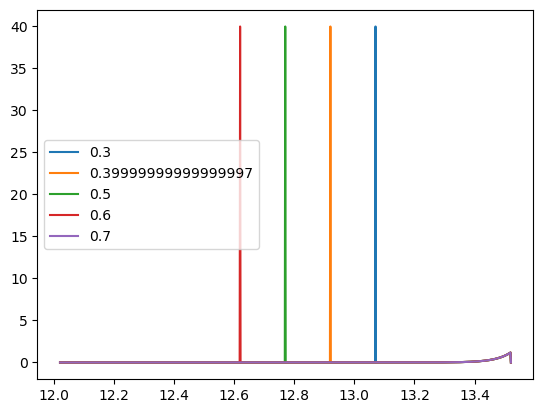

In [184]:
for f in np.linspace(.3,.7,5):
    
    run_params['fage_burst'] = f
    run_params['tburst'] = tburst_from_fage(**run_params)
    sfrs = parametric_sfr(times=times,**run_params)
    plot(times_plot,sfrs,label=f'{f}')

# xlim([times_plot[-1]*1.001,times_plot[0]/1.001])
legend()

show()

0.3 1.5 
 {'zred': 3.548, 'mass': 100000000.0, 'logzsol': 0.0, 'dust2': 0.0, 'sfh': 1, 'imf_type': 2, 'dust_type': 0, 'add_burst': True, 'add_trunc': True, 'tau': 0.05, 'tage': 1.5, 'fburst': 0.8, 'fage_burst': np.float64(0.3), 'tburst': np.float64(0.44999999999999996), 'const': 0, 'sf_start': 0, 'sf_trunc': 0}
0.5 1.5 
 {'zred': 3.548, 'mass': 100000000.0, 'logzsol': 0.0, 'dust2': 0.0, 'sfh': 1, 'imf_type': 2, 'dust_type': 0, 'add_burst': True, 'add_trunc': True, 'tau': 0.05, 'tage': 1.5, 'fburst': 0.8, 'fage_burst': np.float64(0.5), 'tburst': np.float64(0.75), 'const': 0, 'sf_start': 0, 'sf_trunc': 0}
0.7 1.5 
 {'zred': 3.548, 'mass': 100000000.0, 'logzsol': 0.0, 'dust2': 0.0, 'sfh': 1, 'imf_type': 2, 'dust_type': 0, 'add_burst': True, 'add_trunc': True, 'tau': 0.05, 'tage': 1.5, 'fburst': 0.8, 'fage_burst': np.float64(0.7), 'tburst': np.float64(1.0499999999999998), 'const': 0, 'sf_start': 0, 'sf_trunc': 0}


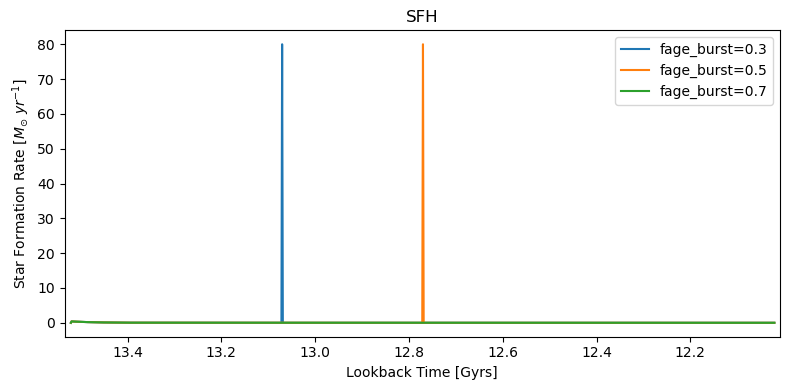

In [139]:
figure(figsize=(8,4))

times = np.linspace(0,run_params['tage'],1000)
times_plot = times + Planck13.lookback_time(run_params['zred']).value

# fages = np.linspace(0,1,3)
# ranges_dict['fage_burst'] = fages

current = 'fage_burst'

for f in ranges_dict[current]:
    run_params[current] = f
    run_params['tburst'] = tburst_from_fage(**run_params)
    print(run_params['fage_burst'],run_params['tage'],'\n', run_params)
    sfrs = parametric_sfr(times=times,**run_params)
    plot(times_plot,sfrs,label=f'{current}={f}')

xlabel('Lookback Time [Gyrs]')
ylabel(r'Star Formation Rate [$M_{\odot}$ $yr^{-1}$]')

title_text = 'SFH'
title(title_text)

xlim([times_plot[-1]*1.001,times_plot[0]/1.001])

legend()
tight_layout()

show()

------------

In [59]:
from prospect.models.templates import TemplateLibrary

In [60]:
TemplateLibrary.show_contents()

'type_defaults':
  Explicitly sets dust amd IMF types.
'ssp':
  Basic set of (free) parameters for a delta function SFH
'parametric_sfh':
  Basic set of (free) parameters for a delay-tau SFH.
'dust_emission':
  The set of (fixed) dust emission parameters.
'nebular':
  The set of nebular emission parameters, with gas_logz tied to stellar logzsol.
'nebular_marginalization':
  Marginalize over emission amplitudes line contained inthe observed spectrum
'fit_eline_redshift':
  Fit for the redshift of the emission lines separatelyfrom the stellar redshift
'agn_eline':
  Add AGN emission lines
'outlier_model':
  The set of outlier (mixture) models for spectroscopy and photometry
'agn':
  The set of (fixed) AGN dusty torus emission parameters.
'igm':
  The set of (fixed) IGM absorption parameters.
'spectral_smoothing':
  Set of parameters for spectal smoothing.
'optimize_speccal':
  Set of parameters (most of which are fixed) for optimizing a polynomial calibration vector.
'fit_speccal':
  Set

In [24]:

def getModel(add_burst=False, add_trunc=False, **extras):

    from prospect.models import SpecModel
    from prospect.models.templates import TemplateLibrary

    model_params = TemplateLibrary['parametric_sfh']

    if add_burst:
        model_params.update(TemplateLibrary['burst_sfh'])
        model_params['const'] = {'N': 1, 'isfree': False, 'init': 0.0, 'units': 'Solar Masses per year'}
        if add_trunc:
            model_params['sf_start'] = {'N': 1, 'isfree': False, 'init': 0.0, 'units': 'Gyrs'}
            model_params['sf_trunc'] = {'N': 1, 'isfree': False, 'init': 0.0, 'units': 'Gyrs'}

    for key in list(model_params.keys()):
        model_params[key]['init'] = extras[key]

    model = SpecModel(model_params)
    
    return model_params, model

In [25]:
model_params = TemplateLibrary['parametric_sfh']
model_params

{'zred': {'N': 1,
  'isfree': False,
  'init': 0.1,
  'units': 'redshift',
  'prior': <class 'prospect.models.priors.TopHat'>(mini=0.0,maxi=4.0)},
 'mass': {'N': 1,
  'isfree': True,
  'init': 10000000000.0,
  'units': 'Solar masses formed',
  'prior': <class 'prospect.models.priors.LogUniform'>(mini=100000000.0,maxi=1000000000000.0)},
 'logzsol': {'N': 1,
  'isfree': True,
  'init': -0.5,
  'units': '$\\log (Z/Z_\\odot)$',
  'prior': <class 'prospect.models.priors.TopHat'>(mini=-2,maxi=0.19)},
 'dust2': {'N': 1,
  'isfree': True,
  'init': 0.6,
  'units': 'optical depth at 5500AA',
  'prior': <class 'prospect.models.priors.TopHat'>(mini=0.0,maxi=2.0)},
 'sfh': {'N': 1, 'isfree': False, 'init': 4, 'units': 'FSPS index'},
 'tage': {'N': 1,
  'isfree': True,
  'init': 1,
  'units': 'Gyr',
  'prior': <class 'prospect.models.priors.TopHat'>(mini=0.001,maxi=13.8)},
 'imf_type': {'N': 1, 'isfree': False, 'init': 2},
 'dust_type': {'N': 1, 'isfree': False, 'init': 0},
 'tau': {'N': 1,
  'isfr